# Imports 

In [41]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Uploading the data 

In [42]:
X = pd.read_csv('X.csv')  
df = pd.read_csv('unique_rows.csv')  

# Lowercasing the data 

In [43]:
# Assuming df is your DataFrame
df['Name_company'] = df['Name_company'].str.lower()
df['Name_company_cleaned'] = df['Name_company_cleaned'].str.lower()

In [44]:
df

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
0,10x genomics inc. class a common stock,10x genomics,NaN,United States,Medical Equipment & Supplies,Health Care,10x genomics
1,1933 industries inc,1933 industries,TGIF,Canada,Biotechnology & Pharmaceuticals,Health Care,1933 industries
2,1life healthcare inc,1life healthcare,ONEM,United States,Software & IT Services,Technology & Communications,1life healthcare
3,1st source corporation common stock,1st source,NaN,United States,Commercial Banks,Financials,1st source
4,"22nd century group, inc.",22nd century group,XXII,United States,Tobacco,Food & Beverage,22nd century group
...,...,...,...,...,...,...,...
19499,zymergen inc,zymergen,ZY,United States,Chemicals,Resource Transformation,zymergen
19500,"zynerba pharmaceuticals, inc.",zynerba pharmaceuticals,ZYNE,United States,Biotechnology & Pharmaceuticals,Health Care,zynerba pharmaceuticals
19501,zynex inc. common stock,zynex,NaN,United States,Medical Equipment & Supplies,Health Care,zynex
19502,zynga inc.,zynga,ZNGA,United States,Software & IT Services,Technology & Communications,zynga


In [45]:
# Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company"
top_mots_name_company = df['Name_company'].astype(str).str.split().explode().value_counts().head(20)

# Trouver les 10 premiers mots les plus redondants dans la colonne "Name_company_cleaned"
top_mots_name_company_cleaned =df['Name_company_cleaned'].astype(str).str.split().explode().value_counts().head(10)

# Convert the indices to lists
top_words_name_company = top_mots_name_company.index.tolist()
top_words_name_company_cleaned = top_mots_name_company_cleaned.index.tolist()

top_words_name_company.remove('.')

print(f'\nles mots les plus redendants dans Name_company sont : \n{top_words_name_company} ')
# top_words_name_company = pd.DataFrame(top_words_name_company)
# top_words_name_company
print(f'\nles mots les plus redendants dans Name_company_cleaned sont : \n{top_words_name_company_cleaned}')


les mots les plus redendants dans Name_company sont : 
['ltd', 'inc.', 'co', 'common', 'inc', 'stock', 'group', 'corp', 'co.', 'holdings', 'sa', 'corp.', 'corporation', 'a', 'plc', 'co.,ltd.', 'international', 'industries', 'ag'] 

les mots les plus redendants dans Name_company_cleaned sont : 
['group', 'holdings', 'international', 'industries', 'acquisition', 'energy', 'technologies', 'holding', 'resources', 'technology']


# Looking for specific words : 
# ltd, plc, inc, co,spa, ag, sa, se, corp, limited, nv 

In [74]:
target_words = ['ltd', 'plc', 'inc', 'co','spa', 'ag', 'sa', 'se', 'corp', 'limited', 'nv' , 'co.' ] 

In [75]:
# Initialize an empty dictionary to store the countries and counts corresponding to each word
words_to_countries_counts = {}

# For each word in the list of most common words
for word in target_words:
    # Select the rows where 'Name_company' contains the word
    df_selected = df[df['Name_company'].astype(str).str.endswith(word)]
    
    # Count the number of each unique country
    country_counts = df_selected['Country'].value_counts().to_dict()
    
    # Store the unique countries and their counts in the dictionary
    words_to_countries_counts[word] = country_counts


# Aalysis with  Plotly Express :

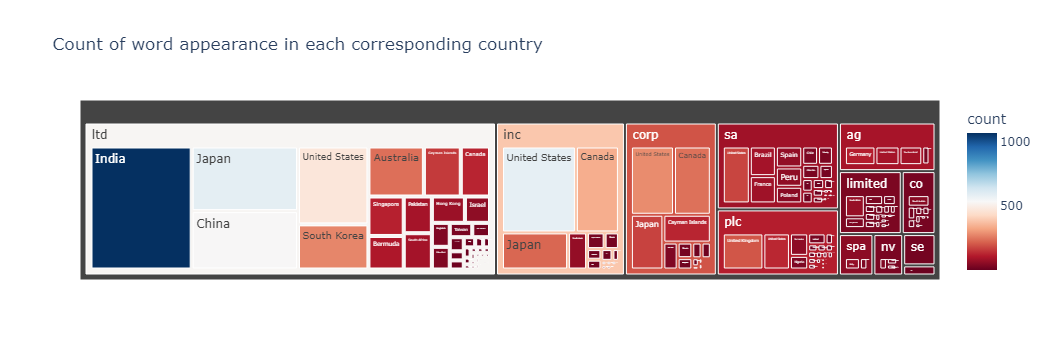

,word,country,count
0,ltd,India,1073
1,ltd,Japan,592
2,ltd,China,535
3,ltd,United States,473
4,ltd,South Korea,274
...,...,...,...
219,co.,Saudi Arabia,12
220,co.,United States,5
221,co.,Japan,3
222,co.,Egypt,1


In [76]:
import plotly.express as px

# Convert the dictionary to a DataFrame suitable for Plotly treemap
data = []
for word, country_dict in words_to_countries_counts.items():
    for country, count in country_dict.items():
        data.append({"word": word, "country": country, "count": count})

df_plot = pd.DataFrame(data)

# Create a treemap
fig = px.treemap(df_plot, path=['word', 'country'], values='count',
                  color='count',
                  color_continuous_scale='RdBu',
                  title='Count of word appearance in each corresponding country')

fig.show()
df_plot

# Confusion Matrix :

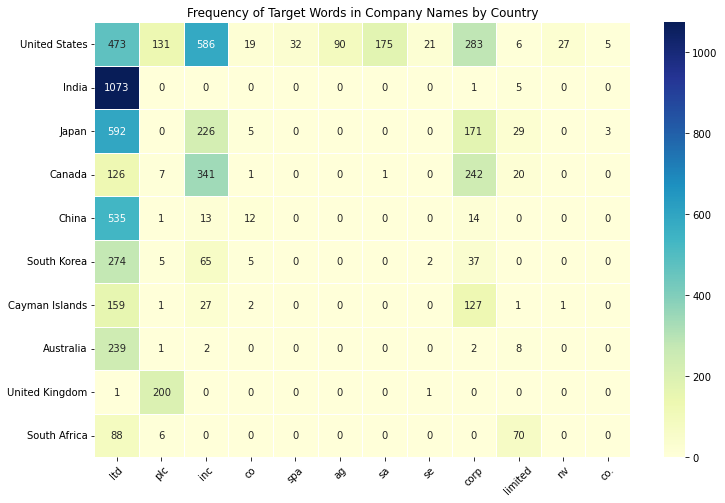

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialiser un DataFrame pour les comptes de mots
word_counts = pd.DataFrame(index=target_words)

# Parcourir chaque pays
for country in df['Country'].unique():
    # Filtrer les entreprises de ce pays
    country_df = df[df['Country'] == country].copy()
    
    # Pour chaque mot cible, compter combien de fois il apparaît dans les noms d'entreprises
    counts = []
    for word in target_words:
        count = country_df['Name_company'].str.endswith(word).sum()
        counts.append(count)
    
    # Ajouter ces comptes à la matrice de fréquences
    word_counts[country] = counts

# Choisissez les 10 premiers pays avec les comptages de mots les plus élevés
top_countries = word_counts.sum(axis=0).nlargest(10).index
word_counts = word_counts[top_countries]

# Transposer le DataFrame
word_counts_transposed = word_counts.T

# Tracer une heatmap des fréquences de mots par pays
plt.figure(figsize=(12, 8))
sns.heatmap(word_counts_transposed, annot=True, cmap='YlGnBu', fmt='d', cbar=True, linewidths=0.5)
plt.title('Frequency of Target Words in Company Names by Country')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

# Bar Graph : 

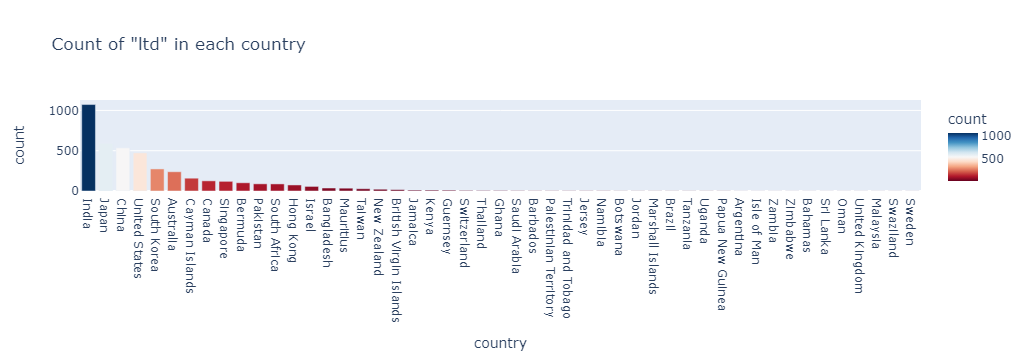

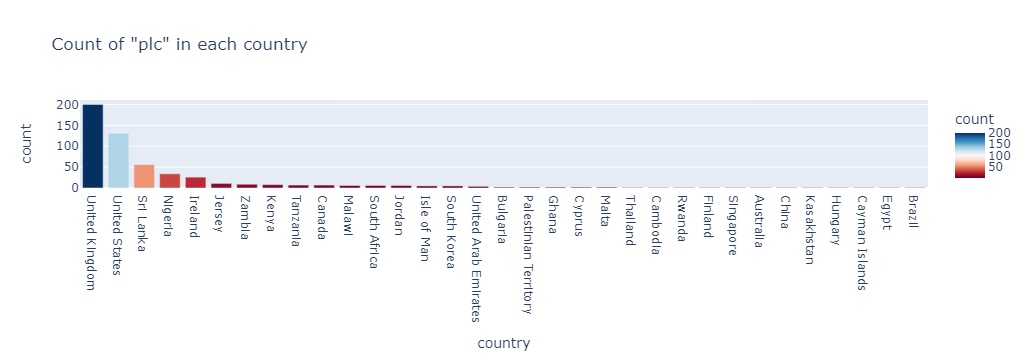

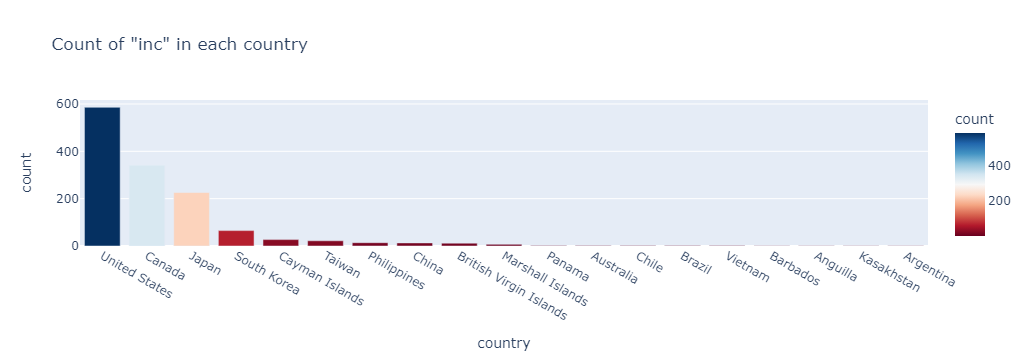

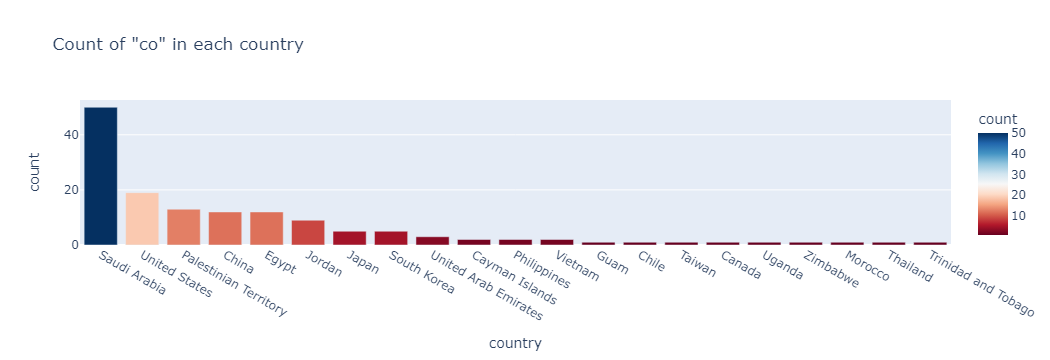

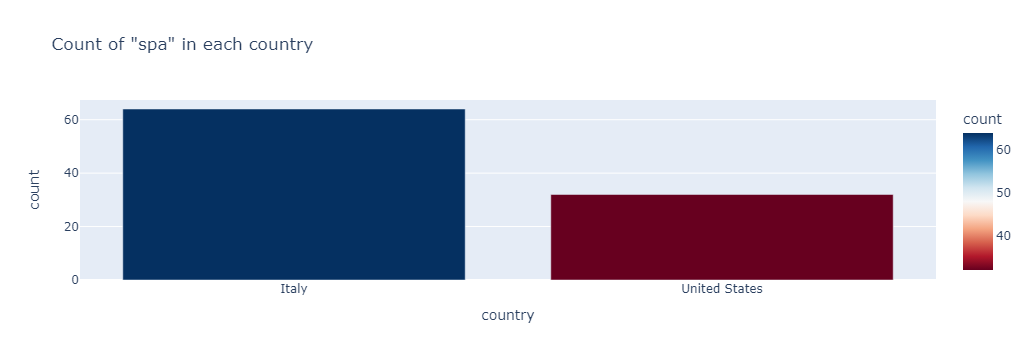

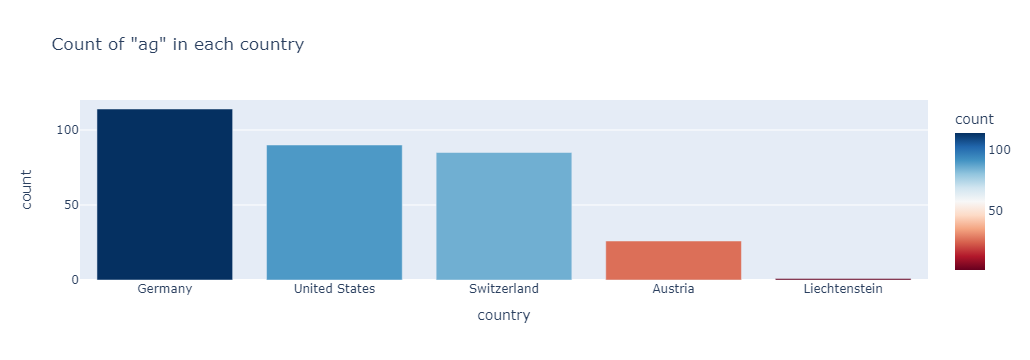

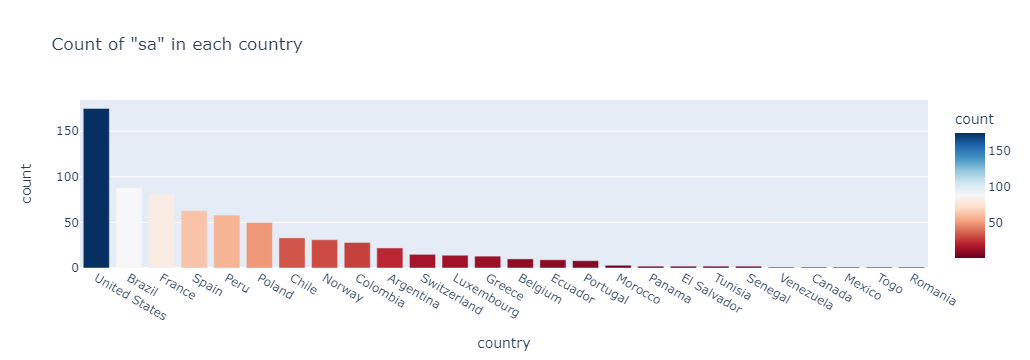

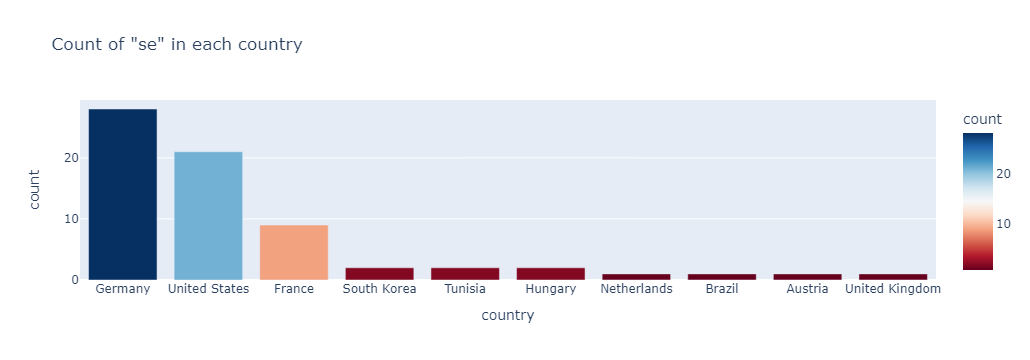

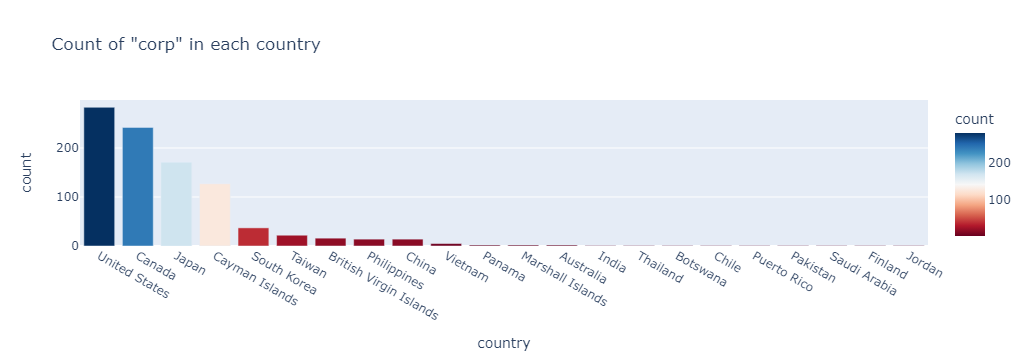

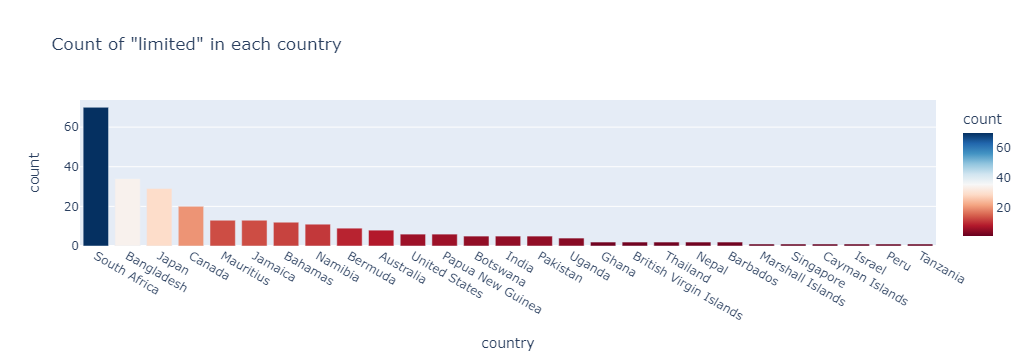

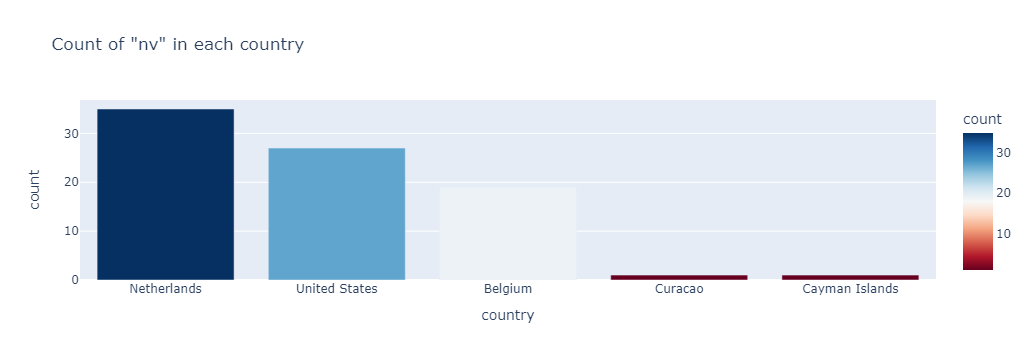

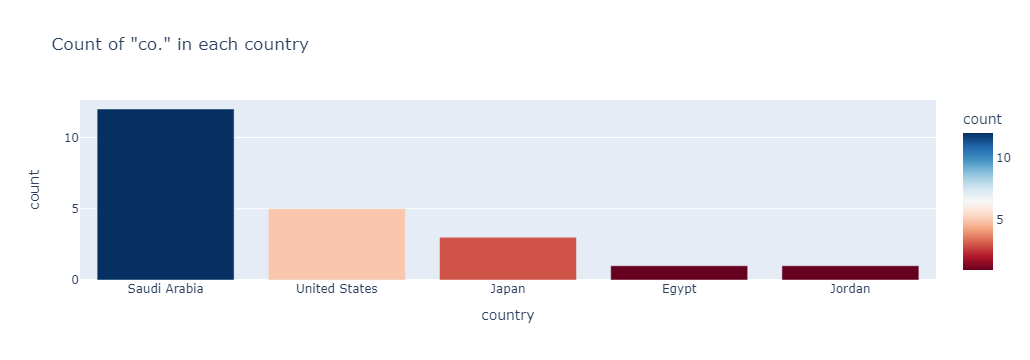

In [78]:
import plotly.express as px

# Convert the dictionary to a DataFrame suitable for Plotly treemap
data = []
for word, country_dict in words_to_countries_counts.items():
    for country, count in country_dict.items():
        data.append({"word": word, "country": country, "count": count})

df_plot = pd.DataFrame(data)



# Create a bar graph for each word
for word in target_words:
    word_data = df_plot[df_plot['word'] == word]
    fig = px.bar(word_data, x='country', y='count', color='count',
                 color_continuous_scale='RdBu', title=f'Count of "{word}" in each country')
    fig.show()


# Quelques verif des resultats : 

# CO :

In [102]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "Name_company"
df.dropna(subset=['Name_company'], inplace=True)

# Définir une expression régulière pour filtrer les lignes contenant le mot "co" ou "co." à la fin du nom de l'entreprise
pattern = r'co\.?$'

# Filtrer les lignes correspondantes en utilisant la méthode str.contains() de pandas avec l'expression régulière
CO = df[df['Name_company'].str.contains(pattern)]

CO = pd.DataFrame(CO)
# Sauvegarder les lignes filtrées dans une nouvelle dataset
CO.to_csv('CO_dataset.csv', index=False)

CO

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
74,abdullah al othaim markets co,abdullah al othaim markets,AOTHAIM,Saudi Arabia,Multiline and Specialty Retailers & Distributors,Consumer Goods,abdullah al othaim markets
75,abdullah saad mohammed abo moati stationaries co.,abdullah saad mohammed abo moati stationaries,NaN,Saudi Arabia,Multiline and Specialty Retailers & Distributors,Consumer Goods,abdullah saad mohammed abo moati stationaries
112,abu dhabi aviation co,abu dhabi aviation,ADAVIATI,United Arab Emirates,Airlines,Transportation,abu dhabi aviation
310,advanced petrochemical co,advanced petrochemical,APPC,Saudi Arabia,Chemicals,Resource Transformation,advanced petrochemical
506,ahliea insurance group co,ahliea insurance group,AIG,Palestinian Territory,Insurance,Financials,ahliea insurance group
...,...,...,...,...,...,...,...
18876,west japan railway co,west japan railway,9021,Japan,Rail Transportation,Transportation,west japan railway
19166,yamama cement co,yamama cement,YACCO,Saudi Arabia,Construction Materials,Extractives & Minerals Processing,yamama cement
19188,yangtze optical fibre and cable joint stock lt...,yangtze optical fibre and cable joint stock,601869,China,Hardware,Technology & Communications,yangtze optical fibre and cable joint stock
19318,zahrat al waha for trading co,zahrat al waha for trading,OASIS,Saudi Arabia,Containers & Packaging,Resource Transformation,zahrat al waha for trading


In [105]:
# Filtrer les lignes où la valeur de la colonne "Country" est "Saoudi Arabi"
SA = CO.loc[CO['Country'] == 'Saudi Arabia']
US = CO.loc[CO['Country'] == 'United States']
print(SA.shape)
print(US.shape)

(62, 7)
(24, 7)


In [101]:
SA

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
74,abdullah al othaim markets co,abdullah al othaim markets,AOTHAIM,Saudi Arabia,Multiline and Specialty Retailers & Distributors,Consumer Goods,abdullah al othaim markets
75,abdullah saad mohammed abo moati stationaries co.,abdullah saad mohammed abo moati stationaries,NaN,Saudi Arabia,Multiline and Specialty Retailers & Distributors,Consumer Goods,abdullah saad mohammed abo moati stationaries
310,advanced petrochemical co,advanced petrochemical,APPC,Saudi Arabia,Chemicals,Resource Transformation,advanced petrochemical
620,al alamiya for cooperative insurance co,al alamiya for cooperative insurance,ALALAMIY,Saudi Arabia,Insurance,Financials,al alamiya for cooperative insurance
625,al hassan ghazi ibrahim shaker co,al hassan ghazi ibrahim shaker,SHAKER,Saudi Arabia,Industrial Machinery & Goods,Resource Transformation,al hassan ghazi ibrahim shaker
...,...,...,...,...,...,...,...
18189,united electronics co,united electronics,EXTRA,Saudi Arabia,Multiline and Specialty Retailers & Distributors,Consumer Goods,united electronics
18199,united international transportation co,united international transportation,BUDGET,Saudi Arabia,Car Rental & Leasing,Transportation,united international transportation
19166,yamama cement co,yamama cement,YACCO,Saudi Arabia,Construction Materials,Extractives & Minerals Processing,yamama cement
19318,zahrat al waha for trading co,zahrat al waha for trading,OASIS,Saudi Arabia,Containers & Packaging,Resource Transformation,zahrat al waha for trading


In [106]:
US

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
948,american equity investment life holding co,american equity investment life holding,AEL,United States,Insurance,Financials,american equity investment life holding
1513,ascent industries co.,ascent industries,NaN,United States,Metals & Mining,Extractives & Minerals Processing,ascent industries
2021,baker hughes co,baker hughes,BKR,United States,Oil & Gas - Services,Extractives & Minerals Processing,baker hughes
2585,blink charging co,blink charging,BLNK,United States,Electrical & Electronic Equipment,Resource Transformation,blink charging
3338,central japan railway co,central japan railway,CJPRY,United States,Rail Transportation,Transportation,central japan railway
4828,diamondrock hospitality co,diamondrock hospitality,DRH,United States,Real Estate,Infrastructure,diamondrock hospitality
5154,east japan railway co,east japan railway,EJPRY,United States,Rail Transportation,Transportation,east japan railway
5155,east resources acquisition co,east resources acquisition,ERESU,United States,Asset Management & Custody Activities,Financials,east resources acquisition
5429,emerson electric co.,emerson electric,EMR,United States,Electrical & Electronic Equipment,Resource Transformation,emerson electric
5861,evoqua water technologies co,evoqua water technologies,AQUA,United States,Industrial Machinery & Goods,Resource Transformation,evoqua water technologies


# Limited 

In [108]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne "Name_company"
df.dropna(subset=['Name_company'], inplace=True)

# Définir une expression régulière pour filtrer les lignes contenant le mot "co" ou "co." à la fin du nom de l'entreprise
pattern = r'limited?$'

# Filtrer les lignes correspondantes en utilisant la méthode str.contains() de pandas avec l'expression régulière
LIMITED = df[df['Name_company'].str.contains(pattern)]

LIMITED = pd.DataFrame(LIMITED)
# Sauvegarder les lignes filtrées dans une nouvelle dataset
LIMITED.to_csv('LIMITED_dataset.csv', index=False)

LIMITED

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
12,4sight holdings limited,4sight holdings,NaN,South Africa,Software & IT Services,Technology & Communications,4sight holdings
15,5paisa capital limited,5paisa capital,NaN,India,Investment Banking & Brokerage,Financials,5paisa capital
66,abc motors company limited,abc motors,NaN,Mauritius,Multiline and Specialty Retailers & Distributors,Consumer Goods,abc motors
109,absa bank limited,absa bank,NaN,Mauritius,Commercial Banks,Financials,absa bank
134,accelerate property fund limited,accelerate property fund,NaN,South Africa,Real Estate,Infrastructure,accelerate property fund
...,...,...,...,...,...,...,...
18865,wesizwe platinum limited,wesizwe platinum,NaN,South Africa,Metals & Mining,Extractives & Minerals Processing,wesizwe platinum
18984,winton land limited,winton land,NaN,Australia,Real Estate,Infrastructure,winton land
19081,"wynn resorts, limited",wynn resorts,WYNN,United States,Casinos & Gaming,Services,wynn resorts
19211,ycp holdings limited,ycp holdings global,Global,Japan,Professional & Commercial Services,Services,ycp holdings global


In [109]:
# Filtrer les lignes où la valeur de la colonne "Country" est "Saoudi Arabi"
SAF = LIMITED.loc[LIMITED['Country'] == 'South Africa']
Bangladesh = LIMITED.loc[LIMITED['Country'] == 'Bangladesh']
print(SAF.shape)
print(Bangladesh.shape)

(70, 7)
(34, 7)


In [110]:
SAF

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
12,4sight holdings limited,4sight holdings,NaN,South Africa,Software & IT Services,Technology & Communications,4sight holdings
134,accelerate property fund limited,accelerate property fund,NaN,South Africa,Real Estate,Infrastructure,accelerate property fund
305,advanced health limited,advanced health,NaN,South Africa,Health Care Delivery,Health Care,advanced health
335,advtech limited,advtech,NaN,South Africa,Education,Services,advtech
407,afine investments limited,afine investments,NaN,South Africa,Real Estate,Infrastructure,afine investments
...,...,...,...,...,...,...,...
17821,trematon capital investments limited,trematon capital investments,NaN,South Africa,Asset Management & Custody Activities,Financials,trematon capital investments
18263,universal partners limited,universal partners,NaN,South Africa,Asset Management & Custody Activities,Financials,universal partners
18648,visual international holdings limited,visual international holdings,NaN,South Africa,Real Estate,Infrastructure,visual international holdings
18865,wesizwe platinum limited,wesizwe platinum,NaN,South Africa,Metals & Mining,Extractives & Minerals Processing,wesizwe platinum


In [111]:
Bangladesh

,Name_company,Name_company_cleaned,Ticker,Country,Industry,Sector,column1
776,alltex industries limited,alltex industries,NaN,Bangladesh,"Apparel, Accessories & Footwear",Consumer Goods,alltex industries
892,aman cotton fibrous limited,aman cotton fibrous,NaN,Bangladesh,"Apparel, Accessories & Footwear",Consumer Goods,aman cotton fibrous
1558,asia insurance limited,asia insurance,NaN,Bangladesh,Insurance,Financials,asia insurance
2265,bdcom online limited,bdcom online,NaN,Bangladesh,Telecommunication Services,Technology & Communications,bdcom online
2421,beximco synthetics limited,beximco synthetics,NaN,Bangladesh,"Apparel, Accessories & Footwear",Consumer Goods,beximco synthetics
2801,british american tobacco bangladesh company li...,british american tobacco bangladesh,NaN,Bangladesh,Tobacco,Food & Beverage,british american tobacco bangladesh
2851,bsrm steels limited,bsrm steels,NaN,Bangladesh,Iron & Steel Producers,Extractives & Minerals Processing,bsrm steels
3341,central pharmaceuticals limited,central pharmaceuticals,NaN,Bangladesh,Biotechnology & Pharmaceuticals,Health Care,central pharmaceuticals
4717,delta spinners limited,delta spinners,NaN,Bangladesh,"Apparel, Accessories & Footwear",Consumer Goods,delta spinners
4995,doreen power generations and systems limited,doreen power generations and systems,NaN,Bangladesh,Electric Utilities & Power Generators,Infrastructure,doreen power generations and systems
